# A decade of books

_____

![notebook](notebook.jpg)
_____


I've been keeping track of the books I've read in a notebook since 2010. I'd love to create a database with details on the books and authors, but for now this is just a quick visualization.



In [1]:
import pandas as pd

I made a list in LibreOffice Calc with the count per year and the language of the book and exported it to a csv file.

In [2]:
books = pd.read_csv('books.csv')
books.head()

,count,year,language
0,1,2010,en
1,2,2010,nl
2,3,2010,nl
3,4,2010,nl
4,5,2010,nl


In [3]:
# Let's replace the abbreviations of the language.
languages = {'nl':'Dutch', 'en':'English', 'fr':'French'}
books = books.replace(languages)
books.head()

,count,year,language
0,1,2010,English
1,2,2010,Dutch
2,3,2010,Dutch
3,4,2010,Dutch
4,5,2010,Dutch


Dutch is my native language. English quickly became a second language. As of 2010 I started learning Frech. Let's change the data type into an ordered category. 

In [4]:
order_languages = ['Dutch', 'English', 'French']
books['language'] = pd.Categorical(pd.Series(books.language), categories = order_languages, ordered = True)
books.language.dtype

CategoricalDtype(categories=['Dutch', 'English', 'French'], ordered=True)

In [5]:
# Let's use groupby to see the count per year and by language
books_peryear_andlanguage = books.groupby(['year', 'language'])['count'].count()

# Unstacking the language index makes the dataframe easier to read. NaN values are filled with 0.
books_per_year = books_peryear_andlanguage.unstack(level=1, fill_value=0)
books_per_year

language,Dutch,English,French
year,,,
2010,10,3,0
2011,8,5,0
2012,10,7,1
2013,16,8,3
2014,6,6,0
2015,10,4,8
2016,10,9,7
2017,10,4,8
2018,2,5,3


This dataframe can easily be visualized with a stacked bar plot.

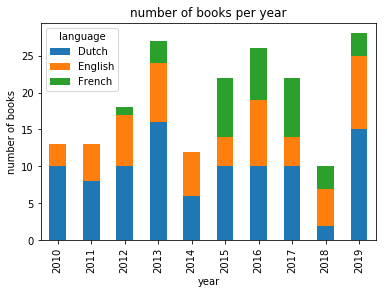

In [9]:
import matplotlib.pyplot as plt
books_per_year.plot(kind='bar', stacked=True)
plt.ylabel('number of books')
plt.title('number of books per year')
plt.show()

What's missing is the total cummulative book count. Below I'm taking the sum per row and additioning it columnwise. 

In [10]:
total_per_year_cummulative = books_per_year.sum(axis=1).cumsum()
total_per_year_cummulative

year
2010     13
2011     26
2012     44
2013     71
2014     83
2015    105
2016    131
2017    153
2018    163
2019    191
dtype: int64

I wanted to see the total amount of books as a line plot on top of the stacked barplot, with its own y-axis. 

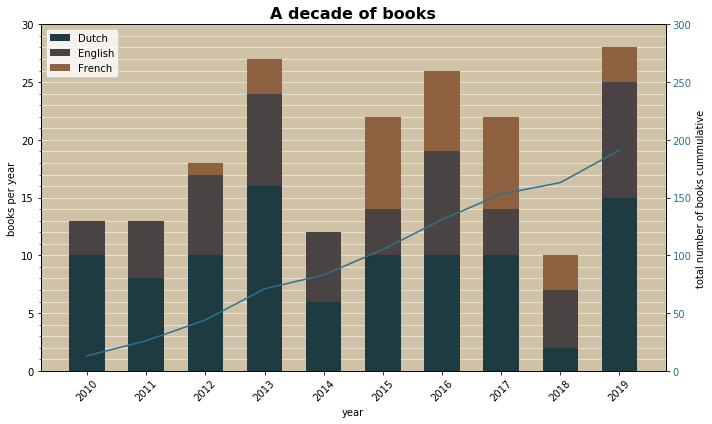

In [16]:
from matplotlib.ticker import MultipleLocator

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_facecolor('#CFC2A7')

ax1.set_xlabel('year')
plt.xticks(books_per_year.index, rotation=45)
plt.yticks(ticks=[*range(0,30)])
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(5))

ax1.set_ylabel('books per year')
ax1.bar(books_per_year.index, books_per_year.Dutch, width=0.6, label='Dutch', color='#1E3B42')
ax1.bar(books_per_year.index, books_per_year.English, width=0.6, label='English', color='#4A4343', bottom=books_per_year.Dutch)
ax1.bar(books_per_year.index, books_per_year.French, width=0.6, label='French', color='#8E6240', bottom=books_per_year.English+books_per_year.Dutch)
ax1.set(ylim=(0, 30))

ax1.set_axisbelow(True)
ax1.grid(color='white', which='minor', axis='y', linestyle='-', linewidth=.5)

ax1.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('total number of books cummulative')
ax2.plot(total_per_year_cummulative, color='#2D728F')
ax2.tick_params(axis='y', labelcolor='#2D728F')
ax2.set(ylim=(0, 300))


plt.title('A decade of books', fontdict={'fontsize':'16', 'fontweight':'bold'})
fig.tight_layout()
plt.show()